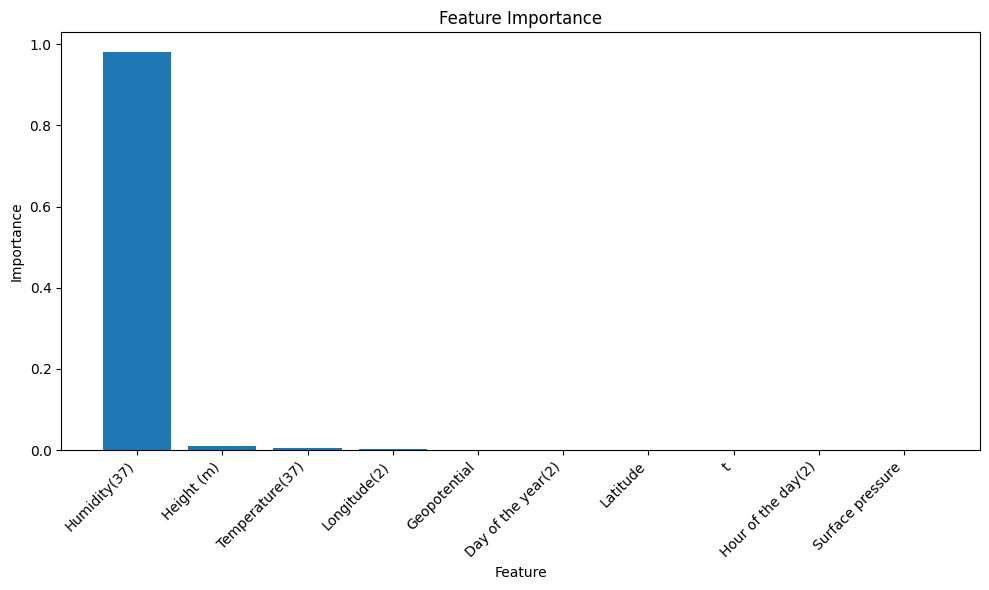

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'feature_importance.csv'
feature_importance_df = pd.read_csv(file_path)

# Grouping and summing the importance values as specified
importance_sums = {
    "humidity": feature_importance_df[feature_importance_df['Feature'].str.startswith('humidity')]['Importance'].sum(),
    "Height (m)": feature_importance_df[feature_importance_df['Feature'] == 'Height (m)']['Importance'].sum(),
    "cos_lon_sin_lon": feature_importance_df[feature_importance_df['Feature'].isin(['cos_lon', 'sin_lon'])]['Importance'].sum(),
    "temperature": feature_importance_df[feature_importance_df['Feature'].str.startswith('temperature')]['Importance'].sum(),
    "geopotential": feature_importance_df[feature_importance_df['Feature'].str.startswith('geopotential')]['Importance'].sum(),
    "cos_doy_sin_doy": feature_importance_df[feature_importance_df['Feature'].isin(['cos_doy', 'sin_doy'])]['Importance'].sum(),
    "Latitude": feature_importance_df[feature_importance_df['Feature'] == 'Latitude']['Importance'].sum(),
    "t": feature_importance_df[feature_importance_df['Feature'] == 't']['Importance'].sum(),
    "cos_hod_sin_hod": feature_importance_df[feature_importance_df['Feature'].isin(['cos_hod', 'sin_hod'])]['Importance'].sum(),
    "surface_pressure": feature_importance_df[feature_importance_df['Feature'].str.startswith('surface_pressure')]['Importance'].sum(),
}

# Mapping the feature names to the desired labels with counts
feature_labels = {
    "humidity": "Humidity(37)",
    "Height (m)": "Height (m)",
    "cos_lon_sin_lon": "Longitude(2)",
    "temperature": "Temperature(37)",
    "geopotential": "Geopotential",
    "cos_doy_sin_doy": "Day of the year(2)",
    "Latitude": "Latitude",
    "t": "t",
    "cos_hod_sin_hod": "Hour of the day(2)",
    "surface_pressure": "Surface pressure"
}

# Preparing data for plotting
labels = list(feature_labels.values())
values = [importance_sums[feature] for feature in feature_labels.keys()]

# Sort the values from largest to smallest
sorted_values = sorted(values, reverse=True)
sorted_labels = [label for _, label in sorted(zip(values, labels), reverse=True)]

# Plotting the sorted bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_labels, sorted_values)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping

# Show the plot
plt.show()

C:\Users\cygao\AppData\Local\Temp\ipykernel_25640\3469771133.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humidity_temperature_features['Pressure'] = humidity_temperature_features['Feature'].str.extract('(\d+)').astype(int)


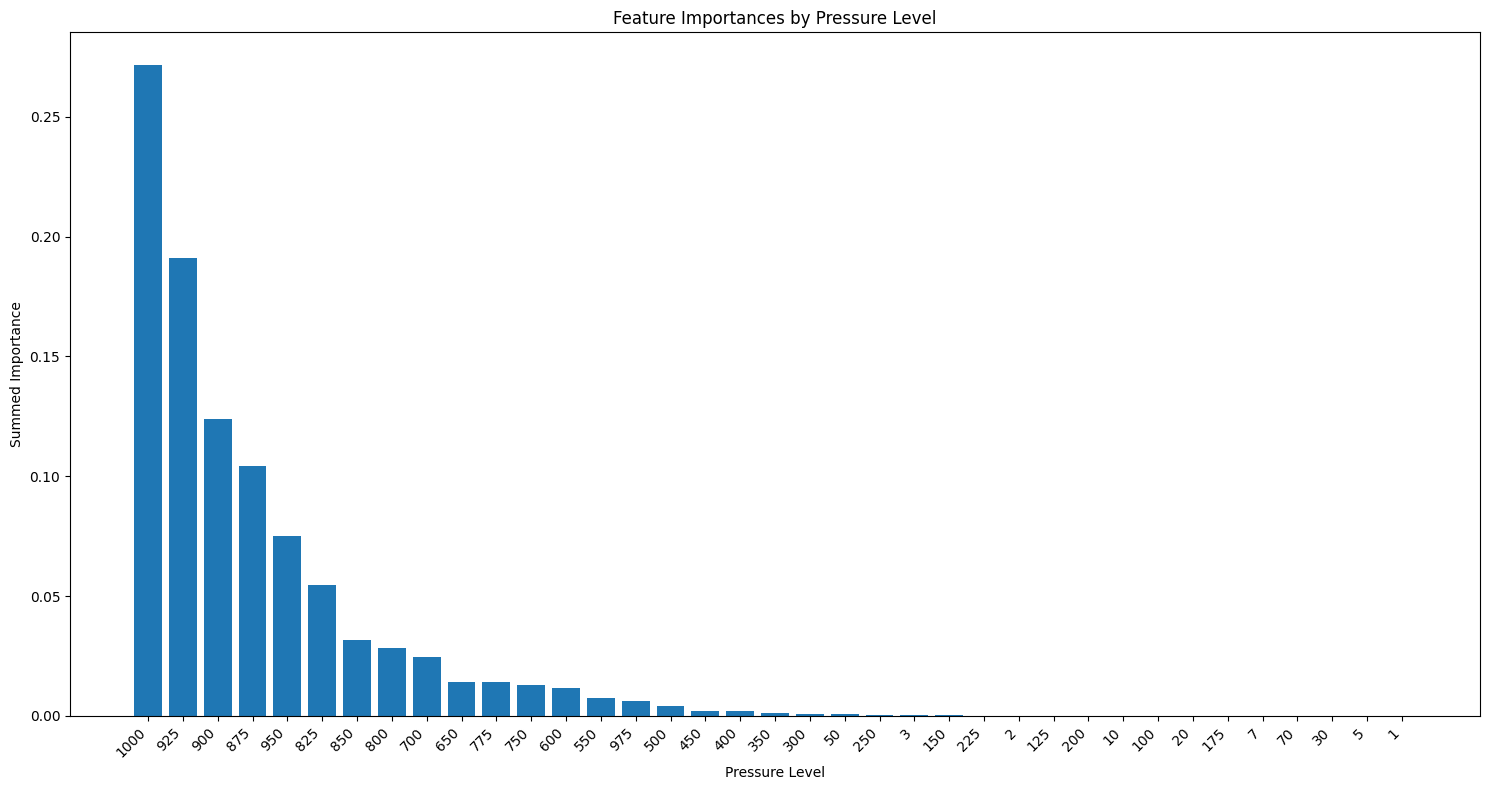

In [2]:
# First, let's filter the features to only include those that start with 'humidity' or 'temperature'
humidity_temperature_features = feature_importance_df[
    feature_importance_df['Feature'].str.startswith(('humidity', 'temperature'))
]

# Extract the pressure level from the feature name and add it as a new column
humidity_temperature_features['Pressure'] = humidity_temperature_features['Feature'].str.extract('(\d+)').astype(int)

# Now we'll sum the importances for each pressure level
pressure_importance_sums = humidity_temperature_features.groupby('Pressure')['Importance'].sum().sort_values(ascending=False)

# Prepare the data for plotting
pressure_levels = pressure_importance_sums.index.astype(str)
importance_values = pressure_importance_sums.values

# Plotting the sorted bar chart for humidity and temperature features by pressure level
plt.figure(figsize=(15, 8))
plt.bar(pressure_levels, importance_values)
plt.title('Feature Importances by Pressure Level')
plt.xlabel('Pressure Level')
plt.ylabel('Summed Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping

# Show the plot
plt.show()


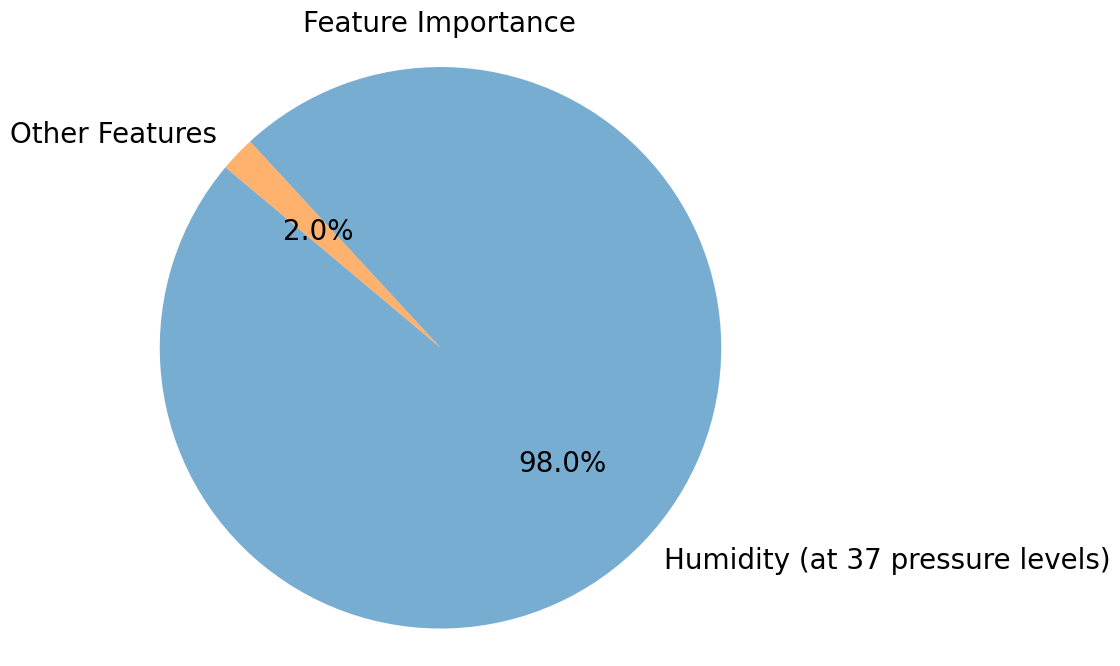

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'feature_importance.csv'
feature_importance_df = pd.read_csv(file_path)

# Grouping and summing the importance values
importance_sums = feature_importance_df.groupby('Feature')['Importance'].sum()

# Setting aside the importance for 'humidity' and summing up the rest
humidity_importance = importance_sums[importance_sums.index.str.startswith('humidity')].sum()
other_importance = importance_sums.sum() - humidity_importance

# Preparing data for plotting
labels = ['Humidity (at 37 pressure levels)', 'Other Features']
values = [humidity_importance, other_importance]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140,wedgeprops={'alpha': 0.6},textprops={'fontsize': 20})
plt.title('Feature Importance', fontsize=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()


C:\Users\cygao\AppData\Local\Temp\ipykernel_10652\366596655.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humidity_temperature_features['Pressure'] = humidity_temperature_features['Feature'].str.extract('(\d+)').astype(int)


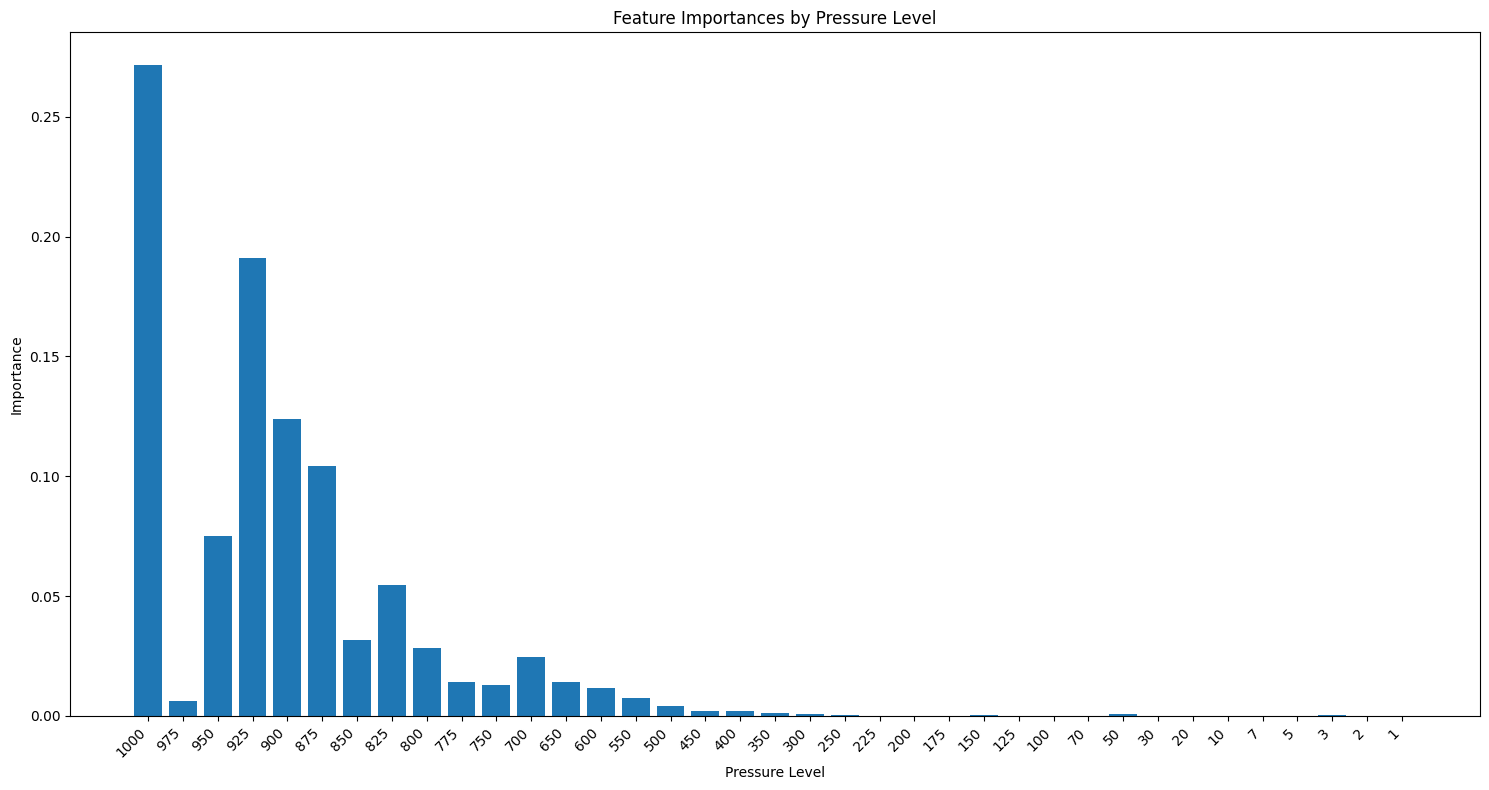

In [6]:
# First, let's filter the features to only include those that start with 'humidity' or 'temperature'
humidity_temperature_features = feature_importance_df[
    feature_importance_df['Feature'].str.startswith(('humidity', 'temperature'))
]

# Extract the pressure level from the feature name and add it as a new column
humidity_temperature_features['Pressure'] = humidity_temperature_features['Feature'].str.extract('(\d+)').astype(int)

# Now we'll sum the importances for each pressure level
pressure_importance_sums = humidity_temperature_features.groupby('Pressure')['Importance'].sum()

# Sort the pressure levels in descending order
pressure_importance_sums = pressure_importance_sums.sort_index(ascending=False)

# Prepare the data for plotting
pressure_levels = pressure_importance_sums.index.astype(str)
importance_values = pressure_importance_sums.values

# Plotting the sorted bar chart for humidity and temperature features by pressure level
plt.figure(figsize=(15, 8))
plt.bar(pressure_levels, importance_values)
plt.title('Feature Importances by Pressure Level')
plt.xlabel('Pressure Level')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping

# Show the plot
plt.show()


C:\Users\cygao\AppData\Local\Temp\ipykernel_656\3422776424.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humidity_temperature_features['Pressure'] = humidity_temperature_features['Feature'].str.extract('(\d+)').astype(int)
C:\Users\cygao\AppData\Local\Temp\ipykernel_656\3422776424.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humidity_temperature_features['Pressure'] = humidity_temperature_features['Pressure'].apply(lambda x: '<=300' if x <= 300 else x)


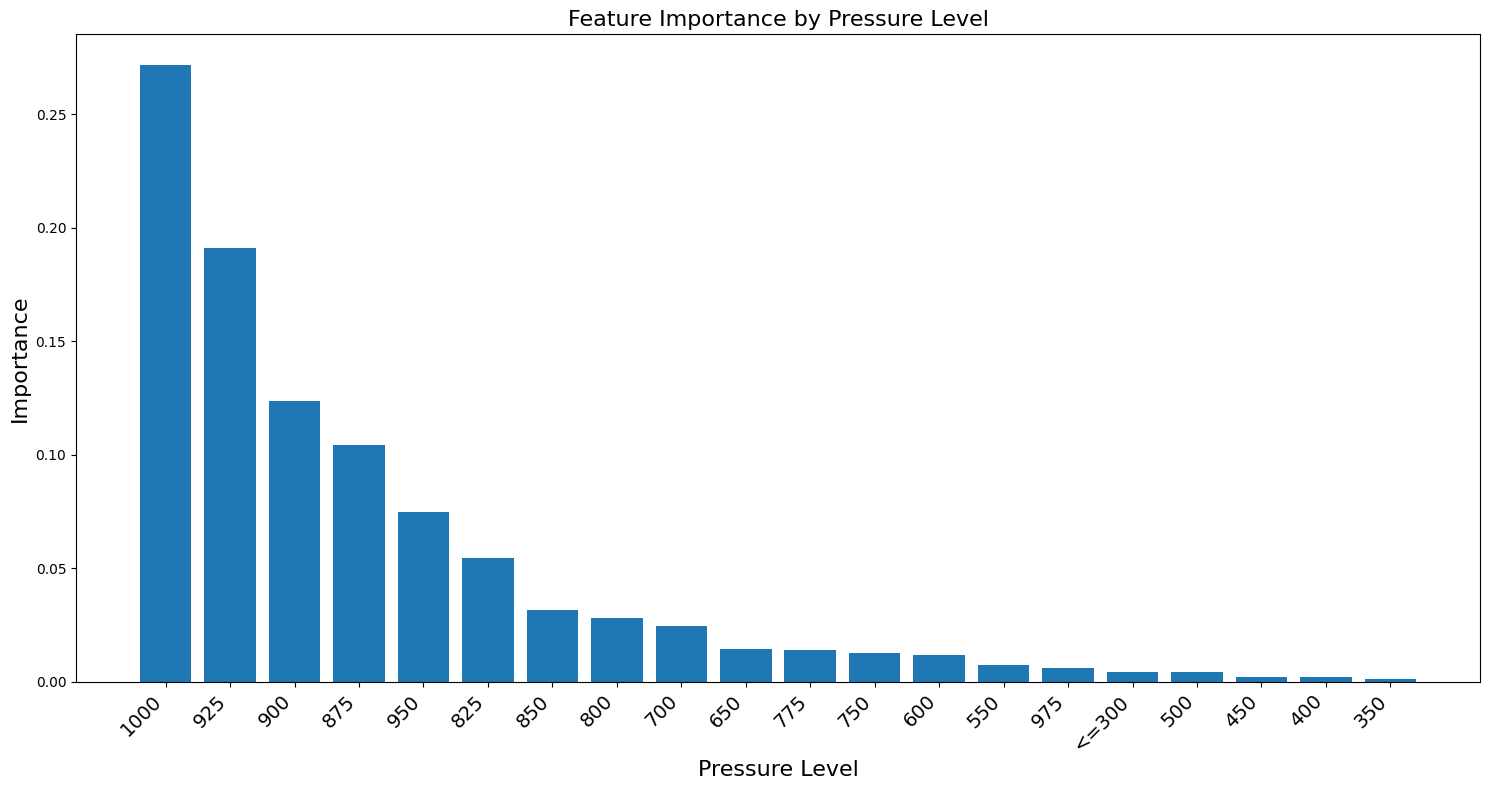

In [5]:
# Filter features that start with 'humidity' or 'temperature'
humidity_temperature_features = feature_importance_df[
    feature_importance_df['Feature'].str.startswith(('humidity', 'temperature'))
]

# Extract the pressure level from feature names and add as a new column
humidity_temperature_features['Pressure'] = humidity_temperature_features['Feature'].str.extract('(\d+)').astype(int)

# Replace all pressure levels less than or equal to 300 with a unified label '<=300'
humidity_temperature_features['Pressure'] = humidity_temperature_features['Pressure'].apply(lambda x: '<=300' if x <= 300 else x)

# Sum the importance for each pressure level
pressure_importance_sums = humidity_temperature_features.groupby('Pressure')['Importance'].sum().sort_values(ascending=False)


pressure_levels = pressure_importance_sums.index.astype(str)
importance_values = pressure_importance_sums.values

# Plot a bar chart sorted by pressure level to show the importance of humidity and temperature features
plt.figure(figsize=(15, 8))
plt.bar(pressure_levels, importance_values)
plt.title('Feature Importance by Pressure Level',fontsize=16)
plt.xlabel('Pressure Level',fontsize=16)
plt.ylabel('Importance',fontsize=16)
plt.xticks(rotation=45, ha='right',fontsize=14)
plt.tight_layout()  


plt.show()
